<a href="https://colab.research.google.com/github/JDM-ULL-93/Practica_TID/blob/master/7_Clustering_Jer%C3%A1rquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índice

[Volver al índice](https://colab.research.google.com/github/JDM-ULL-93/Practica_TID/blob/master/%C3%8Dndice.ipynb)

# Introducción

Nuestros datos representan el conjunto de datos medidos por los 8 sensores del producto "[MYO armband](https://www.youtube.com/watch?v=jOEcsNmTk7g)"


Se trata de 8 sensores que individualmente miden los mismos músculos 8 veces en intervalos de 5 ms. Cada sensor recoge los grados en los que se encuentra girado el músculo esquelético. Este valor varía en un rango entre **[-128º,127º]** cada fila recoge 40ms de estas mediciones, por lo tanto, cada fila recoge 8 mediciones consecutivas de los 8 sensores, de forma que el formato de cada fila es la siguiente:​

    [8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][8sensores]​

Es decir, tenemos 64 predictores y una última variable que es la clase o el atributo a predecir. Según los valores de las 8 mediciones consecutivas de los 8 sensores sobre el musculo, se clasificará en una de las 4 gestos posibles identificados de la siguiente forma:
```c#
Enum {
  Roca = 0,
  Tijeras = 1,
  Papel = 2,
  Ok = 3
}
```
Esta clase corresponde con el tipo de gesto realizándose en posición fija en un lapso de tiempo de duración 40 ms.

Por lo tanto, el formato final de nuestro conjunto de datos es:​

    [8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][Gesto]​

Esto es cada fila. Nuestro conjunto de datos son 11678 filas. 


# Objetivo

Aunque el objetivo ya se ha cumplido, obtener un clasificador (2 en este caso) con un error del 5%, aplicaremos algoritmos de agrupamiento sobre nuestro conjunto de datos para analizar y entender en mayor profundidad la naturaleza de los mismos. Aunque, por lo que ya sabemos, la clusterización de nuestros datos es una tarea muy difícil dada la parte de su naturaleza que ya conocemos.

En este cuaderno en específico, se aplicará el clustering jerárquico a partir de dendogramas.

# **Paquetes necesarios**

*   **caret:** contiene funciones para entrenar y dibujar modelos de clasificación y regresión. Aunque para este modelo, solo lo usaremos para un balanceo  con **upSample**
*   **dplyr:** contiene funciones para la manipulación de datos tales como filtrado por filas, selección de columnas, reordenación de filas ...

















In [0]:
if (!requireNamespace("caret"))
  install.packages("caret")
library(caret)
if (!requireNamespace("dplyr"))
  install.packages("dplyr")
library(dplyr)

Loading required namespace: caret

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




# Carga y visualización de datos

Empezamos cargando nuestro datasheet a memoria. Este datasheet ha sido sacado de la página "Kaggle" y puede encontrarse en el siguiente enlace:

https://www.kaggle.com/kyr7plus/emg-4

El datasheet que se carga es el producto de unir los 4 conjunto de datos (cada uno por cada tipo de gesto) en uno solo.

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1.42838349,0.40170696,1.15012947,1.1730891,-0.04710804,-0.48219055,-4.293642,-4.24028809,-0.45983856,0.22415026,⋯,-1.7855609,3.3968017,0.39488063,1.7644141,0.7726201,0.2324183,-0.2592921,-2.2783569,1.0694782,0
2,-2.50338498,-0.44813614,-0.85390090,-0.8425861,0.73718804,-0.01724597,1.445703,-0.60602378,0.58850359,-0.28255256,⋯,-1.5876586,2.6277596,0.56147502,1.3619800,0.7726201,0.7368608,0.8365519,4.4517214,1.0050871,0
3,-0.99530940,-0.61810475,-1.45511001,-0.9769644,-1.16753100,-0.21097288,-3.097945,0.82172292,0.03674456,0.47750168,⋯,-5.4137702,0.4304965,0.64477221,0.3558947,-0.9878456,0.4005658,0.8365519,4.5704875,3.1299941,0
4,0.13574728,0.31672265,0.14811428,0.3668191,0.00891311,0.87389779,4.275519,-0.86561409,-0.84606988,-0.11365162,⋯,-2.4452353,-0.5582719,0.39488063,1.5631970,1.5851427,1.8578441,1.5410231,4.7684310,2.8080385,0
5,0.35118665,0.06176972,0.14811428,-0.1706943,-0.77538297,0.40895322,-1.981961,0.36743988,0.42297588,0.05524932,⋯,2.5682902,-1.8766298,-0.60468571,0.5571117,0.9080405,-0.7204175,-0.9246259,-4.3765578,-4.4037671,0
6,0.83592523,-0.36315183,-0.85390090,-1.9176128,0.68116689,-0.83089898,-1.463826,2.37926477,0.53332768,0.56195215,⋯,-1.6536260,0.3206333,0.56147502,1.3619800,1.5851427,0.2884675,1.1887875,-1.8428813,1.6489983,0
7,-0.61829051,-0.36315183,-0.05228875,0.6355757,-0.88742526,-0.63717207,-2.699379,-0.99540924,-0.62536627,-0.19810209,⋯,0.1274949,-1.9315614,-0.77128010,-2.2599270,-2.0712090,-0.6643683,-1.8247835,0.2949083,-1.8925134,0
8,2.34400081,0.06176972,-0.25269179,0.9043324,0.62514574,1.02887931,2.083408,1.79518657,-0.45983856,-0.11365162,⋯,2.7661925,0.8699491,0.39488063,2.1668482,3.4810288,0.5126641,0.5234537,2.9473510,3.0656030,0
9,-1.80320704,0.31672265,1.95174161,3.9950344,0.34504000,-0.94713512,-4.891490,-0.02194558,0.69885539,-0.45145350,⋯,-0.3342772,2.2981702,0.06169185,-1.8574929,-2.2066295,1.1852541,0.1320808,1.7201014,0.7475226,0


       V1                  V2                 V3                  V4          
 Min.   :-5.411816   Min.   :-8.77660   Min.   :-6.465186   Min.   :-8.63653  
 1st Qu.:-0.456711   1st Qu.:-0.27817   1st Qu.:-0.453095   1st Qu.:-0.43945  
 Median :-0.025832   Median :-0.02321   Median :-0.052289   Median :-0.03632  
 Mean   :-0.000584   Mean   :-0.00182   Mean   : 0.005197   Mean   : 0.01625  
 3rd Qu.: 0.351187   3rd Qu.: 0.31672   3rd Qu.: 0.548920   3rd Qu.: 0.36682  
 Max.   : 6.006470   Max.   : 7.28544   Max.   : 6.160205   Max.   : 5.74195  
       V5                  V6                 V7                 V8          
 Min.   :-5.593202   Min.   :-4.39547   Min.   :-5.05092   Min.   :-8.26394  
 1st Qu.:-0.551298   1st Qu.:-0.52094   1st Qu.:-0.14856   1st Qu.:-0.41133  
 Median : 0.008913   Median :-0.01725   Median : 0.01087   Median :-0.02195  
 Mean   :-0.002763   Mean   :-0.00144   Mean   : 0.01616   Mean   : 0.01074  
 3rd Qu.: 0.569125   3rd Qu.: 0.52519   3rd Qu.: 0.17029 

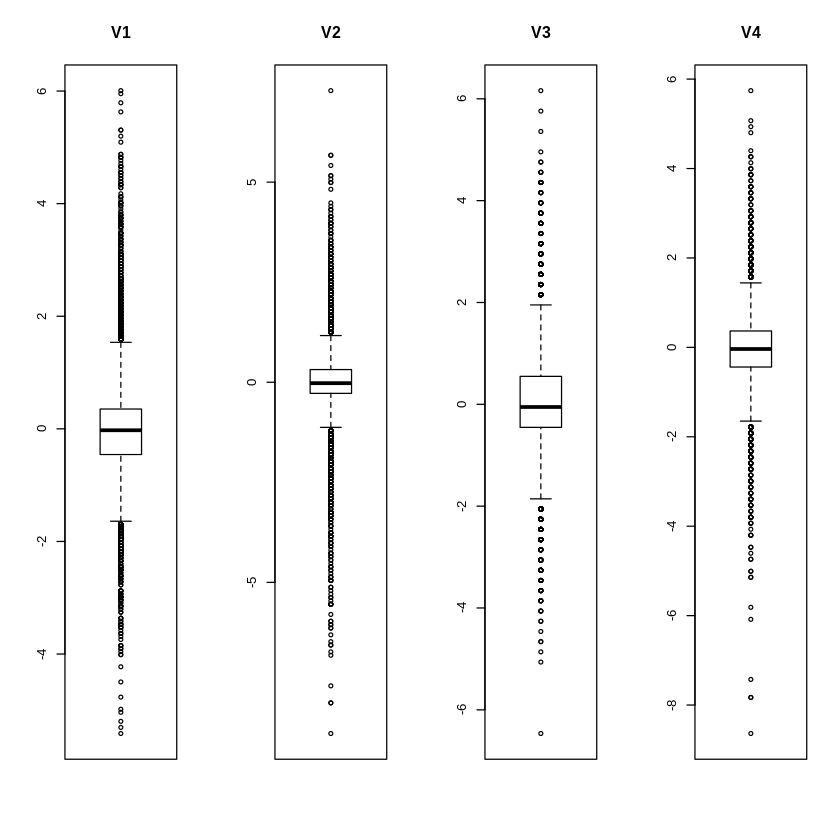

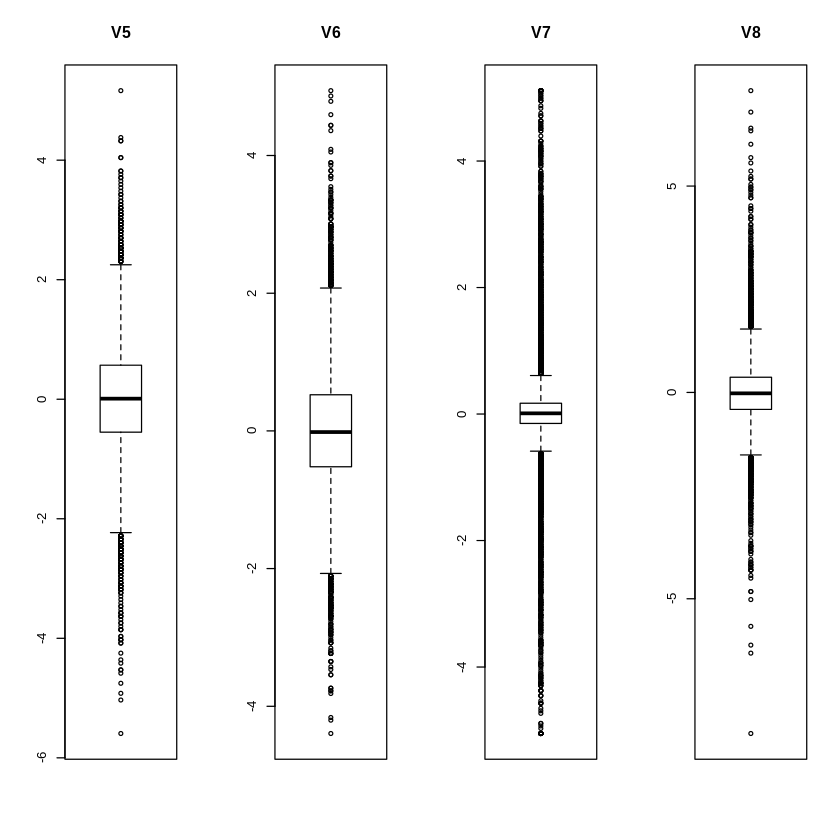

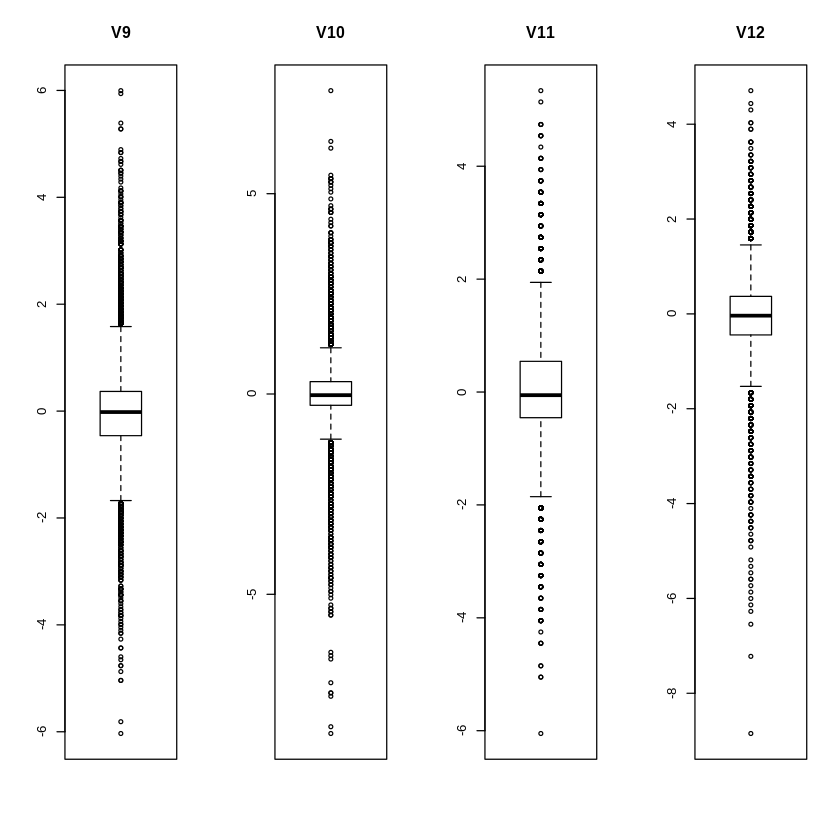

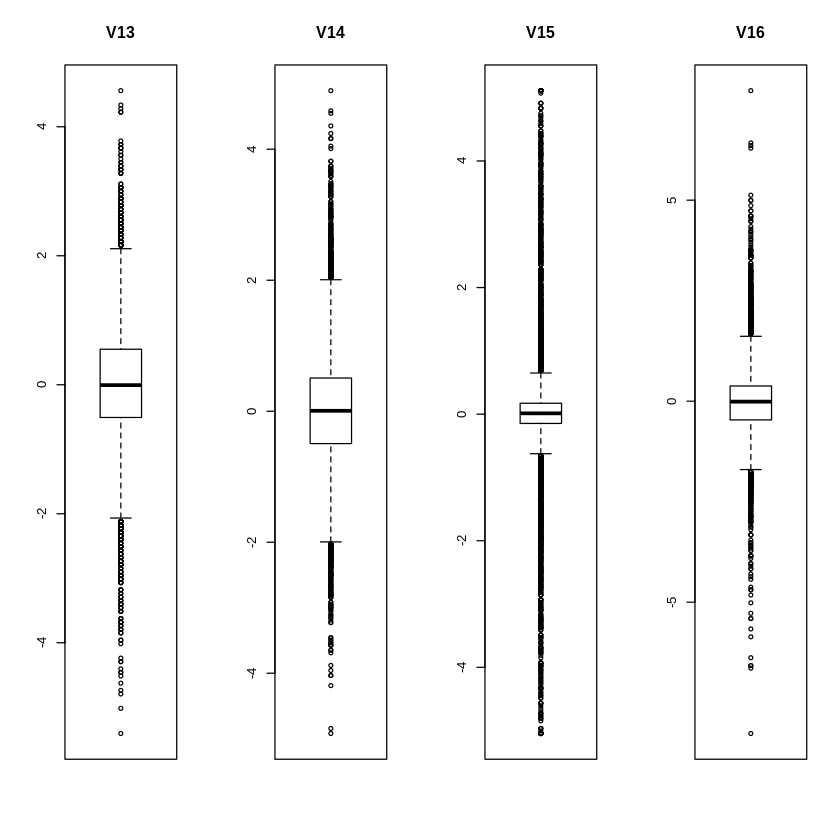

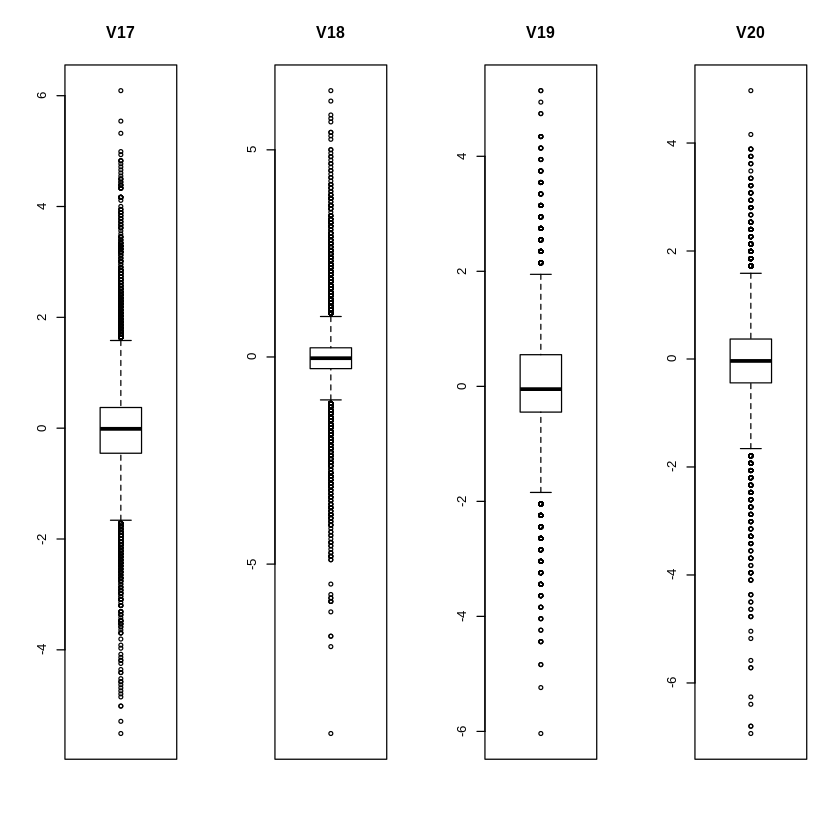

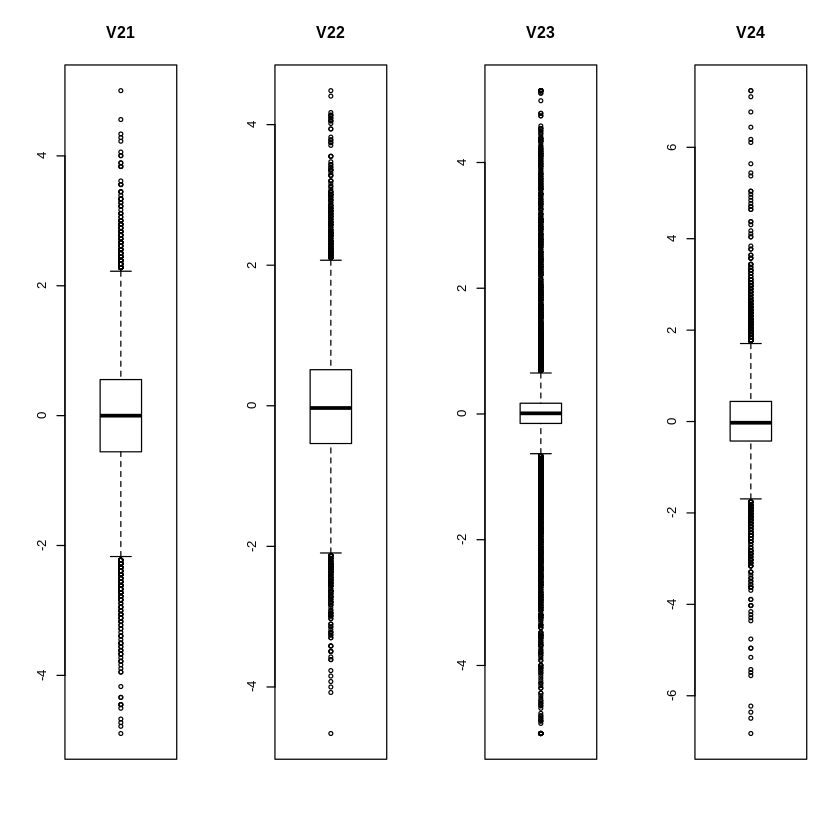

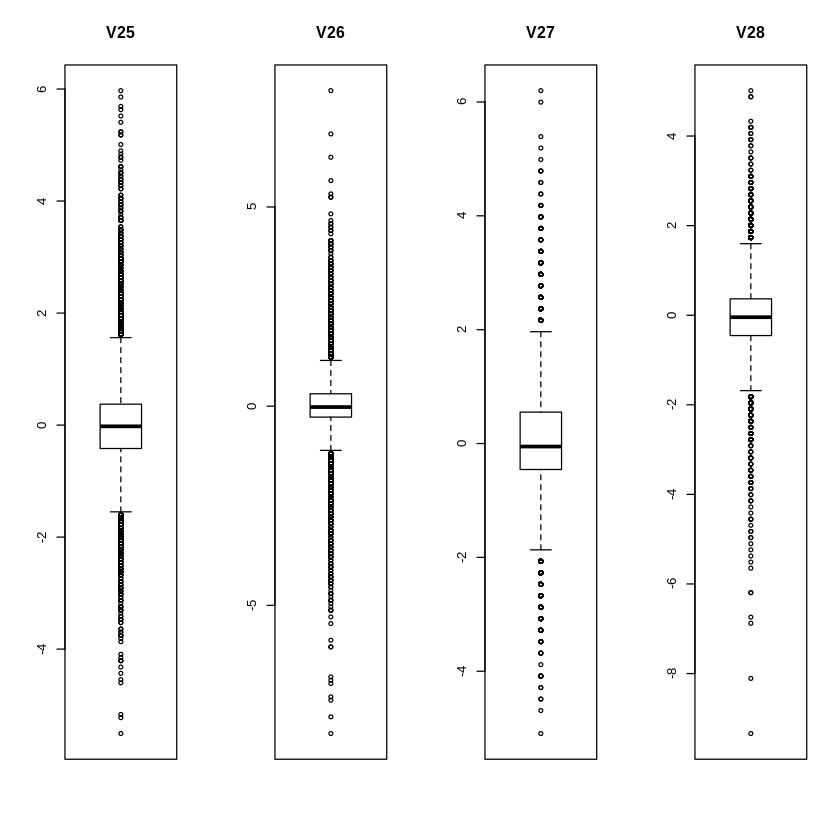

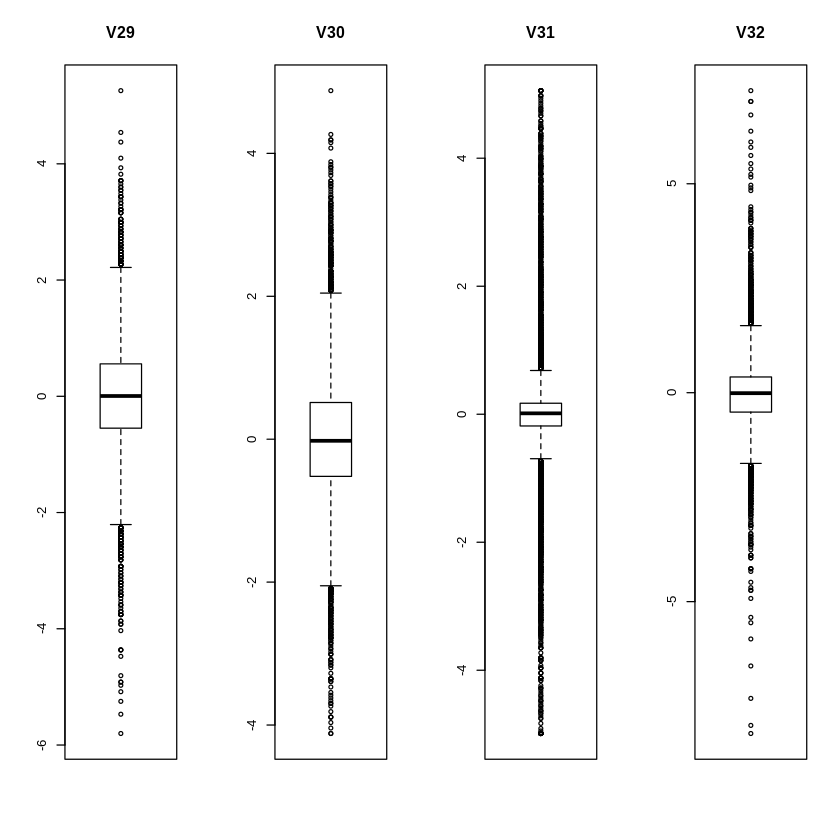

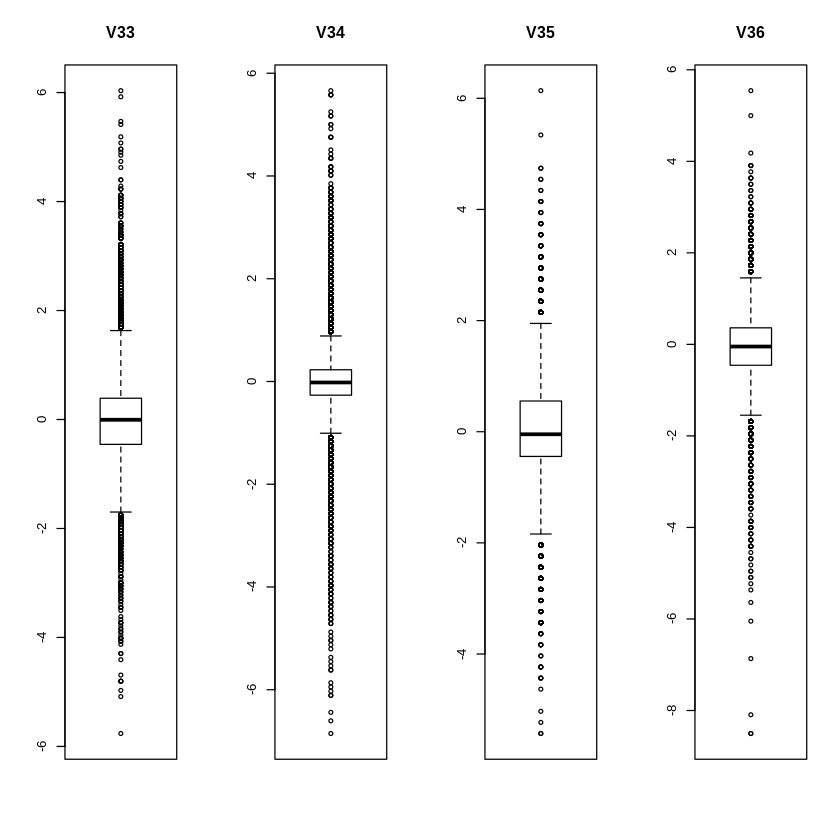

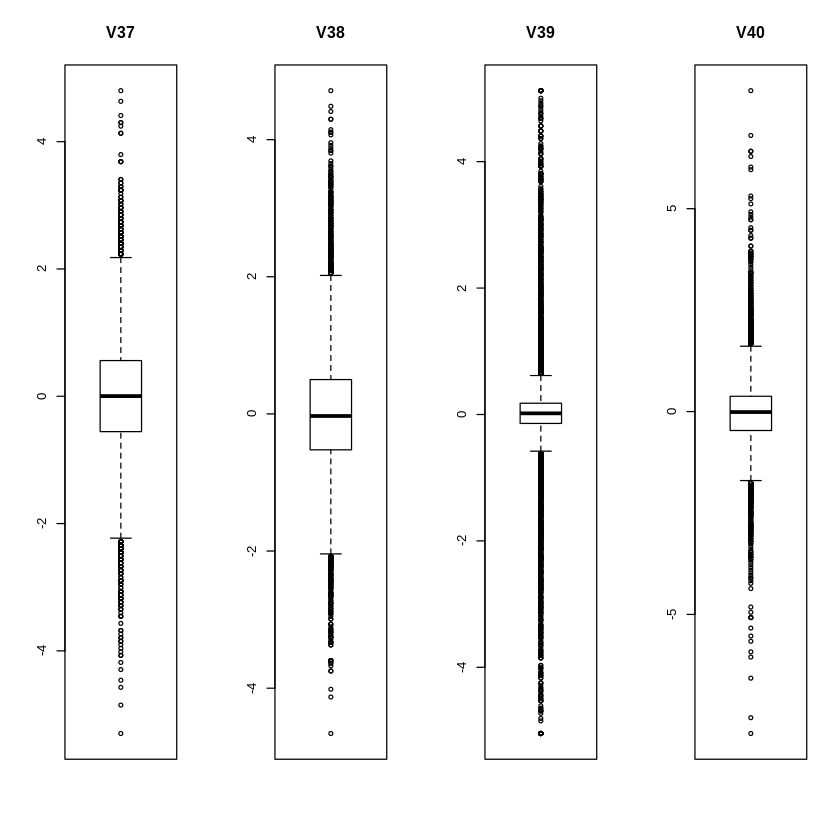

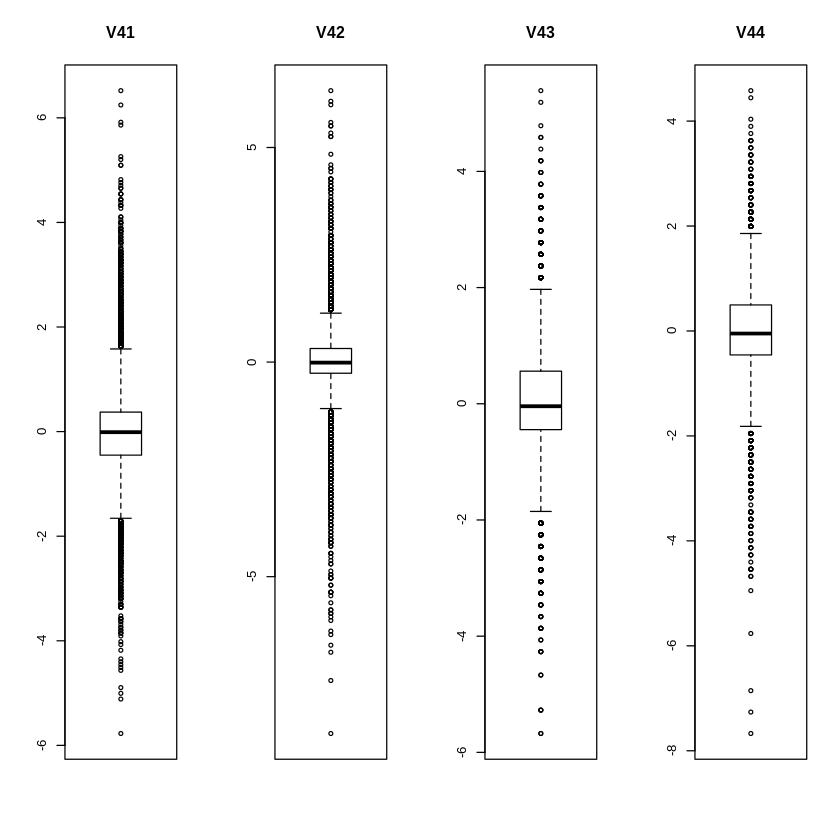

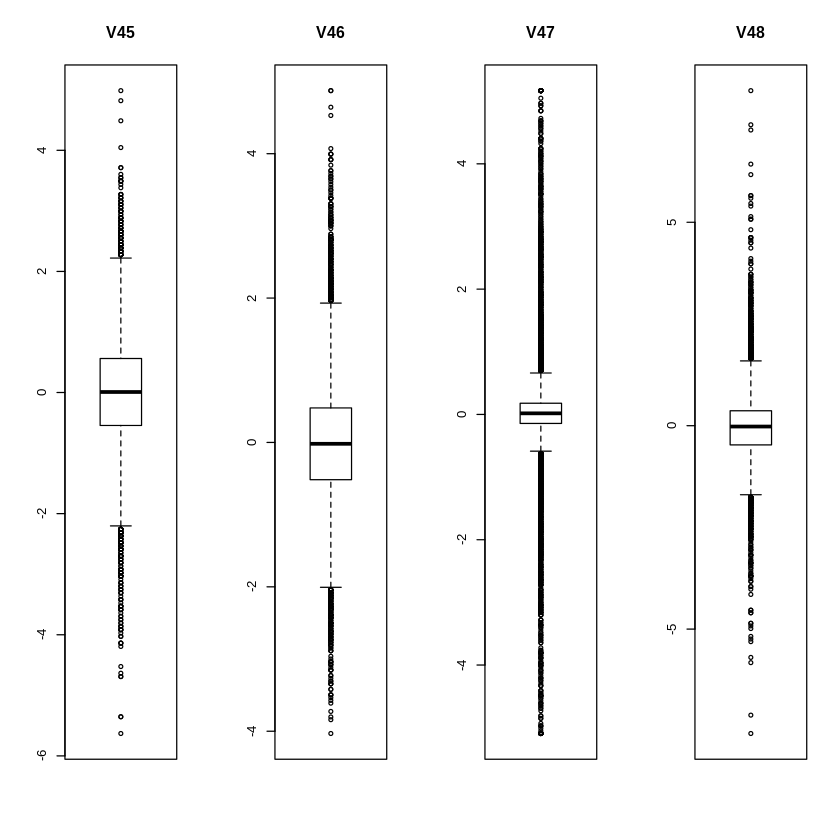

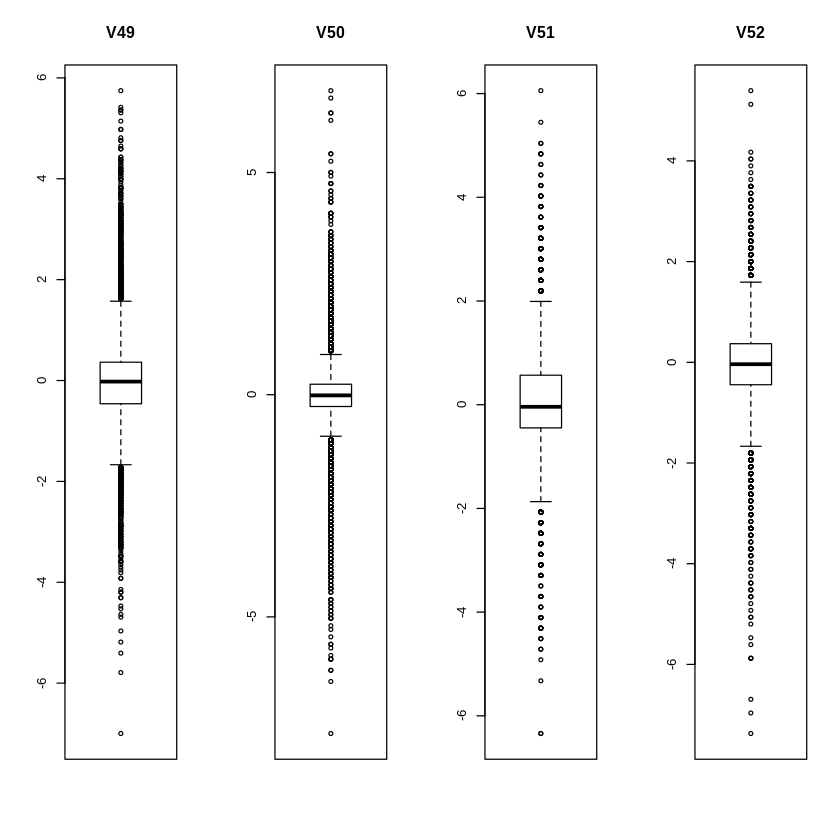

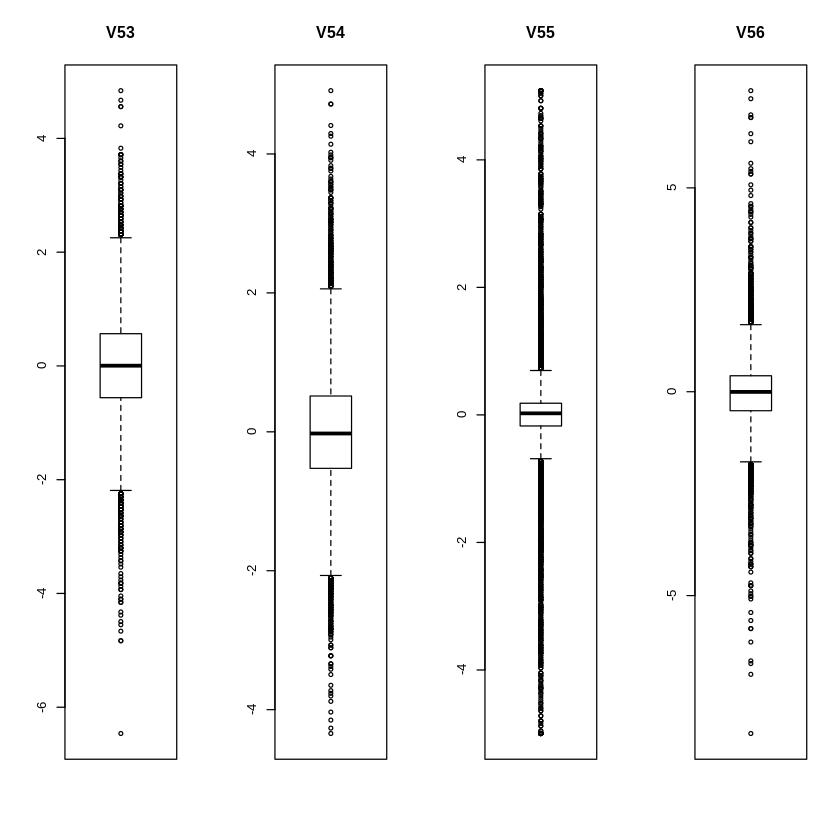

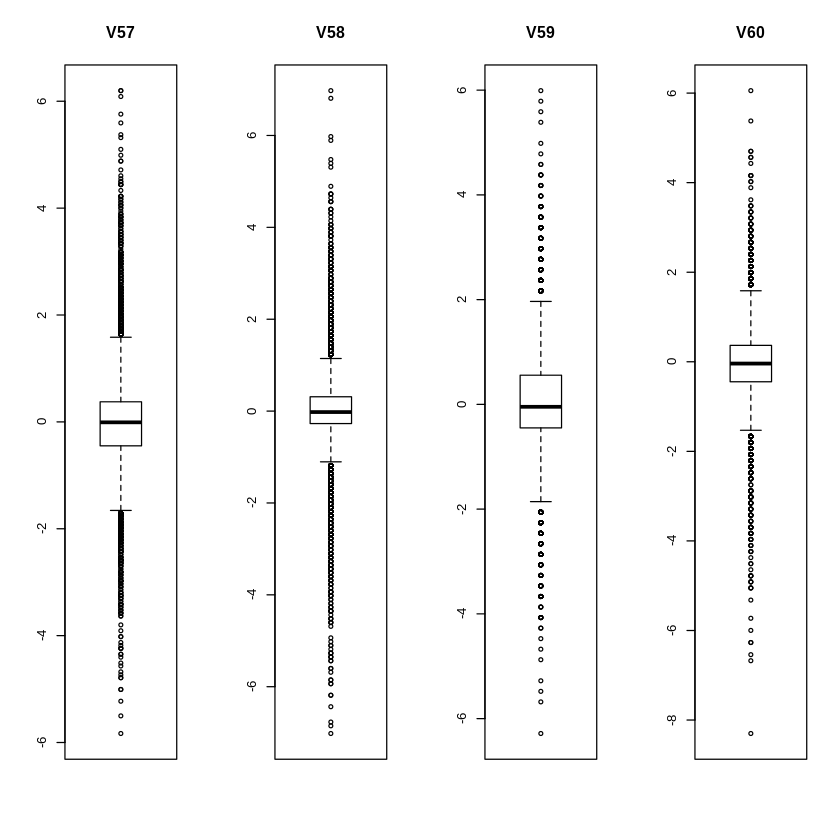

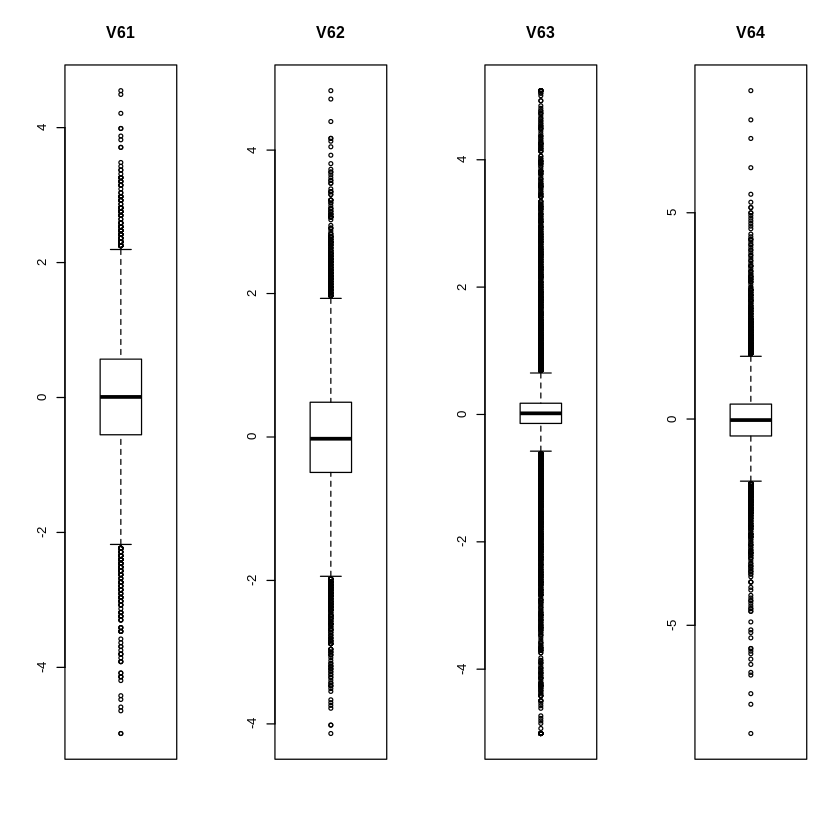

In [0]:
#Cargamos nuestros datos
#data = read.csv("/content/all.csv",header=FALSE, sep=",")
#data = read.csv("https://uc36943bfd09a58be3b54c0ce836.dl.dropboxusercontent.com/cd/0/get/A4R6OXi1GuzkFsDQE41Vj1vo8nvN3gCH8OnA41L9RZdmTUZZSz4sb7MCkkpfc1SyR9V27bcczlCjvpBJDLukItZXb1kPtwTT4PwGwNaCEL1i4ytv9tiHrGZSXI10waPGzIc/file#", header=FALSE, sep = ",")
data = read.csv("/content/cleanedAll.csv",header=FALSE, sep=",")
head(data, 10)

data$V65 <- as.factor(data$V65)
summary(data)

par(mfrow=c(1,4))
for(i in 1:64) {
  boxplot(data[,i], main=names(data)[i])
}


#Preprocesamiento de datos

Ya hicimos un preprocesado de datos, pero todavía faltaría dividir nuestros datos en 2 conjuntos, uno de entrenamiento y otro de validación, de forma que el primero sirva para crear el modelo y el segundo pueda servir para probar el modelo frente al mundo real, detectando la precisión del modelo o el posible sobreajuste de este.

In [0]:
set.seed(56)
data.entrenamiento <- sample_frac(data, 0.5) #Bajado de 0.7 a 0.5 para evitar sobreajustes
data.validacion <- setdiff(data, data.entrenamiento)

#Ejecutamos un upperSample en conjunto de entrenamiento para balancear clases
print("Antes de balanceo upperSample :")
summary(data.entrenamiento$V65)
data.entrenamiento <- upSample(data.entrenamiento, data.entrenamiento$V65)[1:65]
print("Despues de balanceo upperSample :")
summary(data.entrenamiento$V65)




[1] "Antes de balanceo upperSample :"


0    1    2    3 
1315 1330 1389 1194

[1] "Despues de balanceo upperSample :"


0    1    2    3 
1389 1389 1389 1389

# Análisis. Obtención de Clustering Jerárquico

Para obtener el agrupamiento jerárquico podemos usar las funciones *hclust()* (del paquete stats) o *agnes()* (del paquete cluster). Las dos funciones tienen una sintaxis similar. Ambas requieren la matriz de distancias entre los puntos y el método a usar para unir los clusters. Obtendremos un agrupamiento jerárquico con cada función.

Entre los métodos disponibles para las funciones *hclust()* y *agnes()* se encuentran "*single*", "*complete*" y "*average*". La función *hclust()* admite también los métodos "*centroid*" y ward (con el valor "*ward.D2*"). La función *agnes()* admite el método "*ward*".

Podemos visualizar los dendrogramas usando la función genérica *plot()*, para el dendrograma generado al aplicar *hclust()* y la función *pltree()*, para el dendrograma generado por *agnes()*. También es posible visualizar el dendrograma generado por *agnes()* con la función *plot()* si previamente convertimos el objeto devuelto a un objeto de la clase *hclust* usando la función *as.hclust()*.

Como siempre, primero cargaremos las librerías necesarias:

*   **factoextra:** contiene funciones para extraer y visualizar la salida de diferentes análisis de datos multivariantes (análisis de componentes principales, clustering jerárquico ...).
*   **tidyverse:** colección de paquetes para ciencia de datos (dplyr, tidyr, ggplot2 ... )
*   **cluster:** contiene métodos para análisis cluster.
*   **dendextend:** contiene funciones para visualizar y comparar dendrogramas.

Además, también obtenemos la matriz de distancias euclídeas entre todos los pares de puntos. Usamos para ello la función dist() con dos argumentos: el primero es el conjunto de puntos y el segundo el tipo de distancias que usaremos.

In [0]:
if (!requireNamespace("factoextra"))
  install.packages("factoextra")
library(factoextra)

if (!requireNamespace("cluster"))
  install.packages("cluster")
library(cluster)

if (!requireNamespace("tidyverse"))
  install.packages("tidyverse")
library(tidyverse)

if (!requireNamespace("dendextend"))
  install.packages("dendextend")
library(dendextend)

#d <- dist(data, method = "euclidean")

d <- dist(data.entrenamiento, method = "euclidean")

Ahora procedemos a crear los clustering. Usaremos los métodos **complete** y **average**

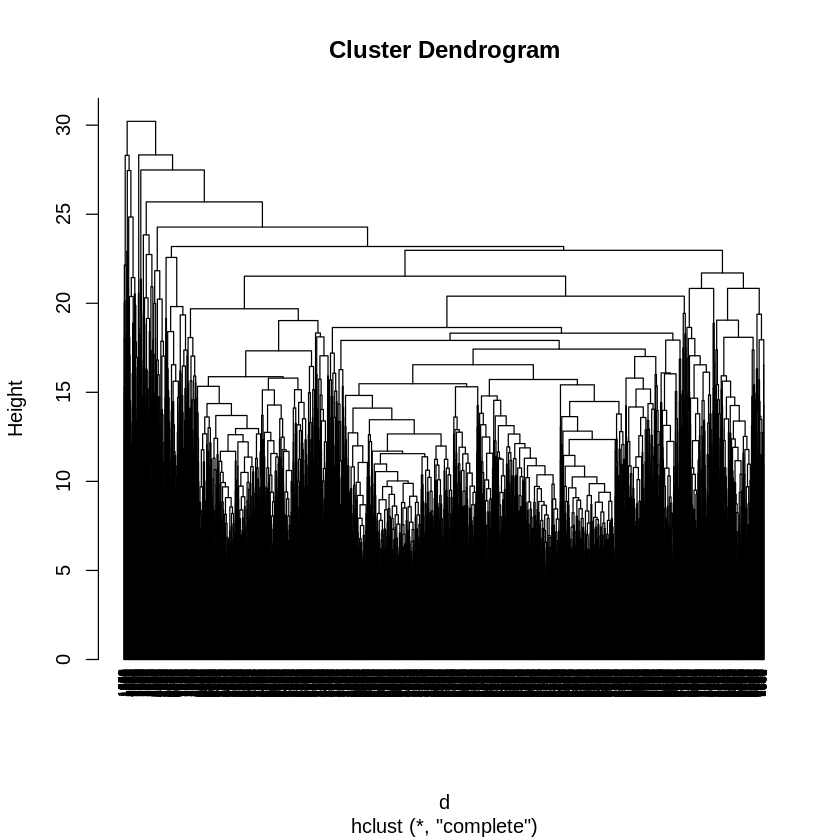

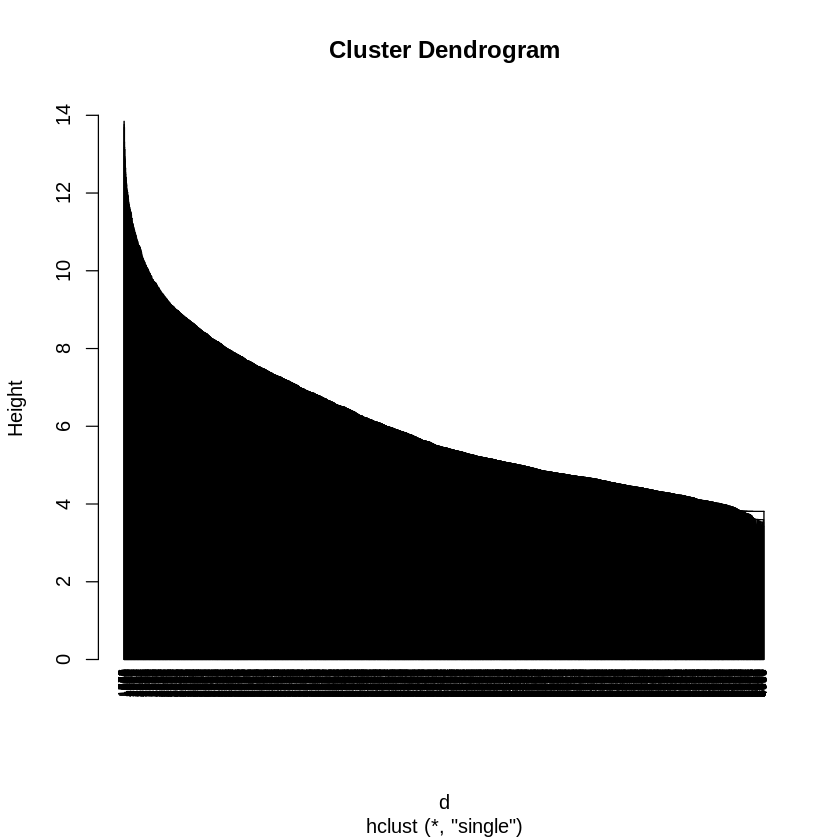

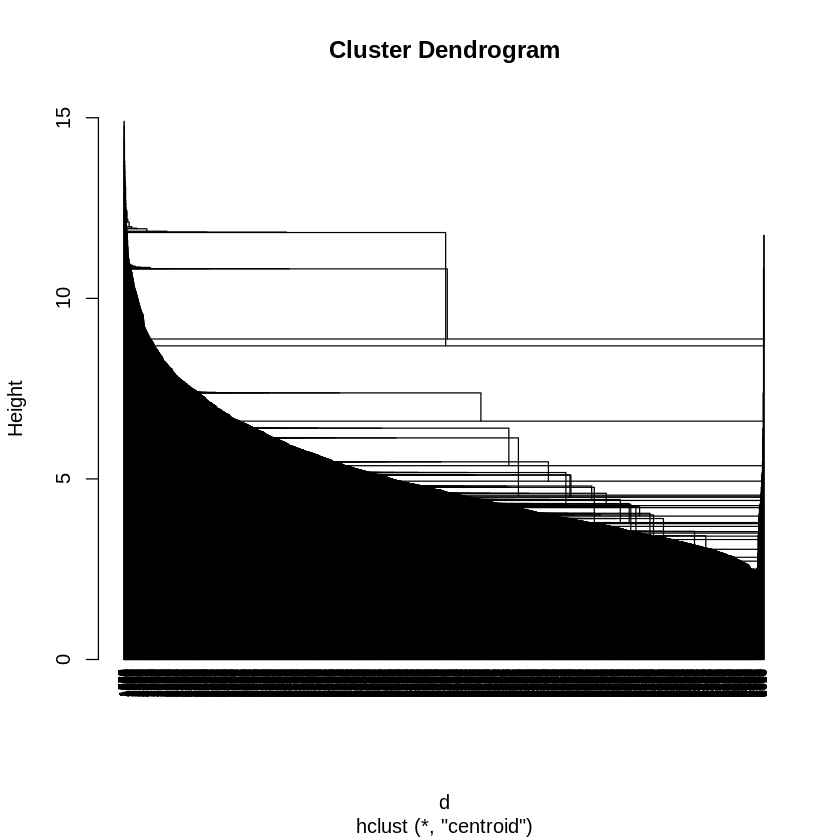

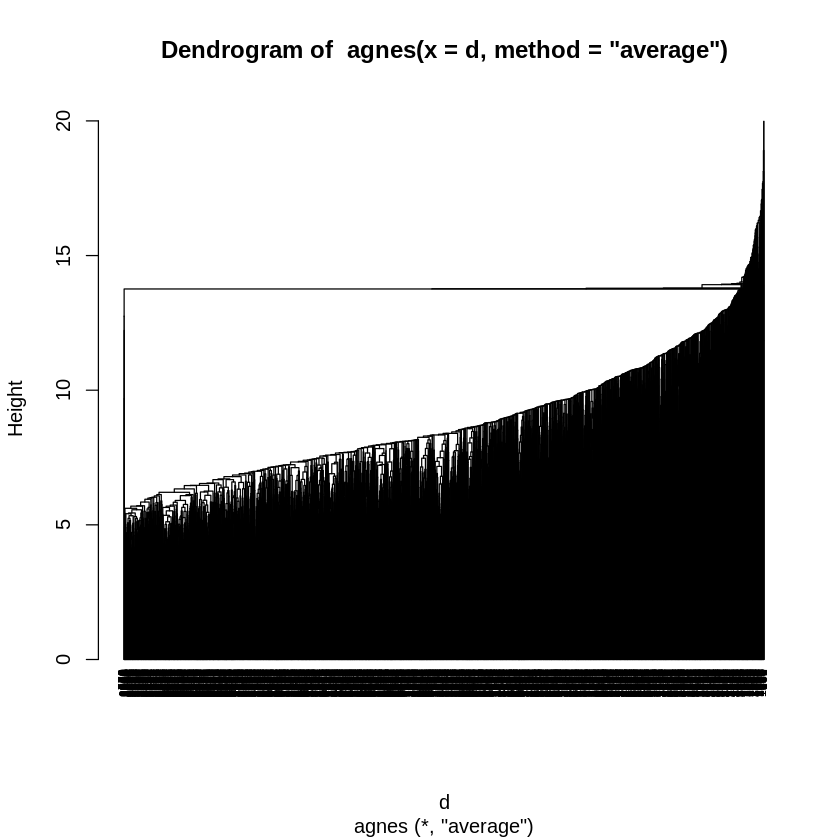

In [0]:
hc1_euclidean_complete <- hclust(d, method = "complete")
hc1_euclidean_single <- hclust(d, method = "single")
hc1_euclidean_centroid <- hclust(d, method = "centroid")
hc2_euclidean_average <- agnes(d, method = "average")



plot(hc1_euclidean_complete, cex = 0.6, hang = -1)
plot(hc1_euclidean_single, cex = 0.6, hang = -1)
plot(hc1_euclidean_centroid, cex = 0.6, hang = -1)
pltree(hc2_euclidean_average, cex = 0.6, hang = -1)

**Validación de los dendrogramas**

Para validar que el dendrograma refleja las distancias originales, podemos utilizar el *cophenetic coefficient* que es igual al coeficiente de correlación entre las distancias originales y de *cophenetic*. La función *cophenetic()* devuelve las distancias de *cophenetic* que se derivan del dendrograma. La función *cor* devuelve el coeficiente de correlación entre los valores que se pasan como argumento.

Es decir, devuelve un valor en el rango [0,1]:
* Cuanto más cercano a 0, peor es la similitud de las distancias del dendograma con las distancias reales.
* Lo contrario cuando más cercano a 1, mejor y mayor es la similitud de las distancias del dendograma generado con las distancias reales.

Podemos comparar los dendrogramas generados anteriormente usando los correspondientes *cophenetic coefficient*. En nuestro caso, de lejos, el mejor dendograma es el calculado con el **método "average"**

In [0]:
c1 <- cophenetic(hc1_euclidean_complete)
c2 <- cophenetic(hc2_euclidean_average)
c3 <- cophenetic(hc1_euclidean_centroid)
c4 <- cophenetic(hc1_euclidean_single)


cor(d, c3)

[1] 0.915092

**Obteniendo clusters desde el dendrograma**

Para obtener clusters desde el dendrograma, debemos cortar este con la función *cutree()* del paquete dendextend. Debemos especificar el número de clusters que deseamos obtener, dado que nuestros datos se clasifican en 4 clases, eligiremos **k = 4**

La función *cutree()* devuelve un vector entero con el índice del cluster al que pertenece cada objeto. Podemos ver cuántos objetos pertenecen a cada cluster con la función *table()*.

In [0]:
print("hc1_euclidean_centroid")
clusters <- cutree(hc1_euclidean_centroid, k = 4)
table(clusters)


print("hc2_euclidean_average")
clusters <- cutree(hc2_euclidean_average, k = 4)
table(clusters)

[1] "hc1_euclidean_centroid"


clusters
   1    2    3    4 
5553    1    1    1 

[1] "hc2_euclidean_average"


clusters
   1    2    3    4 
5552    1    2    1 

Con el dendograma calculado, obtenemos que:
* Para el dendograma calculado con el método **complete** la mayor parte de los gestos los clasifica como clase 0 , un error del ~71%, o , lo que es lo mismo, una precisión de ~29%. 
* Para el dendograma calculado con el método **average** la mayor parte de los gestos los vuelve a clasificar como clase 0, un error muy similiar, en torno al ~*71%* 

Vemos que el clustering jerárquico es incapaz de clusterizar correctamente.

**Mostrando los clusters sobre el dendrograma**

Podemos mostrar los clusters sobre el dendrograma usando la función *fviz_dend* del paquete factoextra. Debemos indicar el dendrograma, el número de clusters y el valor de otros argumentos necesarios para dibujar el agrupamiento. El dendrograma puede mostrarse en horizontal, vertical o circular. Nosotros mostraremos el dendograma en circular.

In [0]:
#No ejecutar: 
fviz_dend(as.hclust(hc1_euclidean_centroid), k = 4, type = "circular", k_colors = "jco", cex = 0.1)

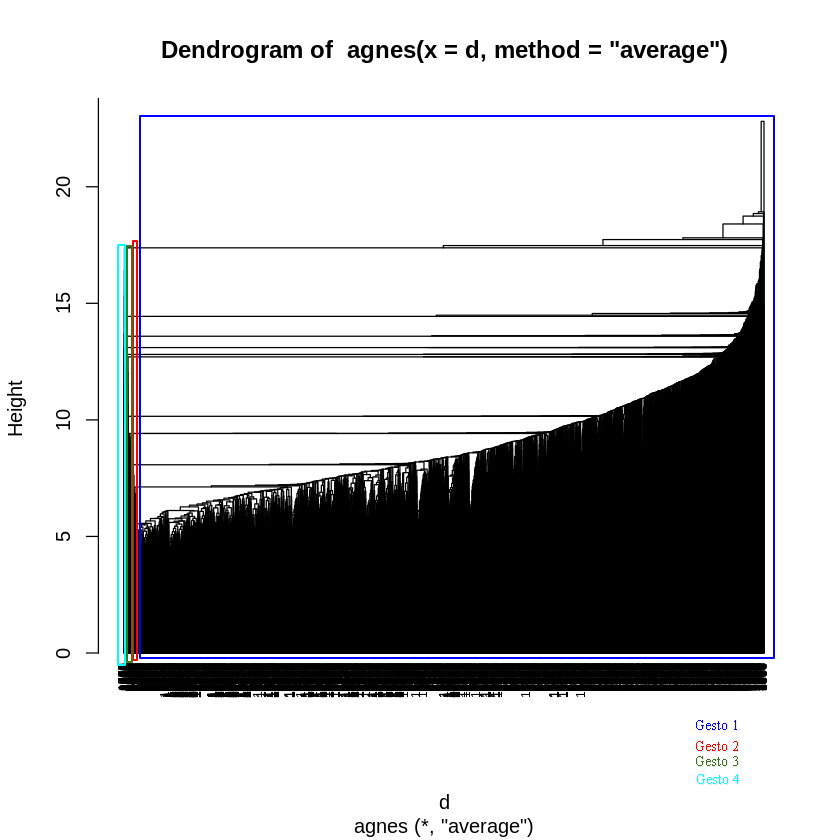



# Conclusión

Para reducir tiempo de computo, el clustering jerárquico se realizó con un conjunto de datos reducido.​

Tras probar con distintas formas de cálculo de distancias (euclídeas, manhattan), y distintos métodos de generación de clusters (promedio de grupo, próximo basado en centroides, enlace simple, enlace completo)​, el que mejor relación con distancias originales (coeficiente de Cophenetic) guarda, ha sido el realizado con distancia "euclídea" y metodo "basado en centroides", obteniendo un indice de Cophenetic del ~*0.9151*

Dado la naturaleza de nuestros datos, todos ellos muy centrados en torno a -20º y 20º, a la hora de generar los clusteres apartir del dendograma, el algoritmo clusteriza la gran mayoría como de la primera clase con la que empieza, y al estar todos muy juntos, selecciona la gran mayoría (el 99%) como clase 0, dejando los valores más alejados del centro del diagrama de densidad como posibles valores para el resto de clases(el 1% restante). 

Con estos resultados, podemos concluir que todo algoritmo que se base únicamente en la clusterización mediante el cálculo de distancias entre datos, está destinado al fracaso, haría falta otra aproximación mucho más enfocada a nuestro problema en particular para poder empezar a tener un clustering que pueda ser mínimamente adecuado.